# **Working with Dataset**

In [111]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading the Dataset
Data = pd.read_csv('/content/winequality-red.csv')
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [112]:
# One-Hot Encoding for 'quality' column
Data.loc[Data['quality'] < 6, 'quality'] = 0
Data.loc[Data['quality'] >= 6, 'quality'] = 1
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<Axes: >

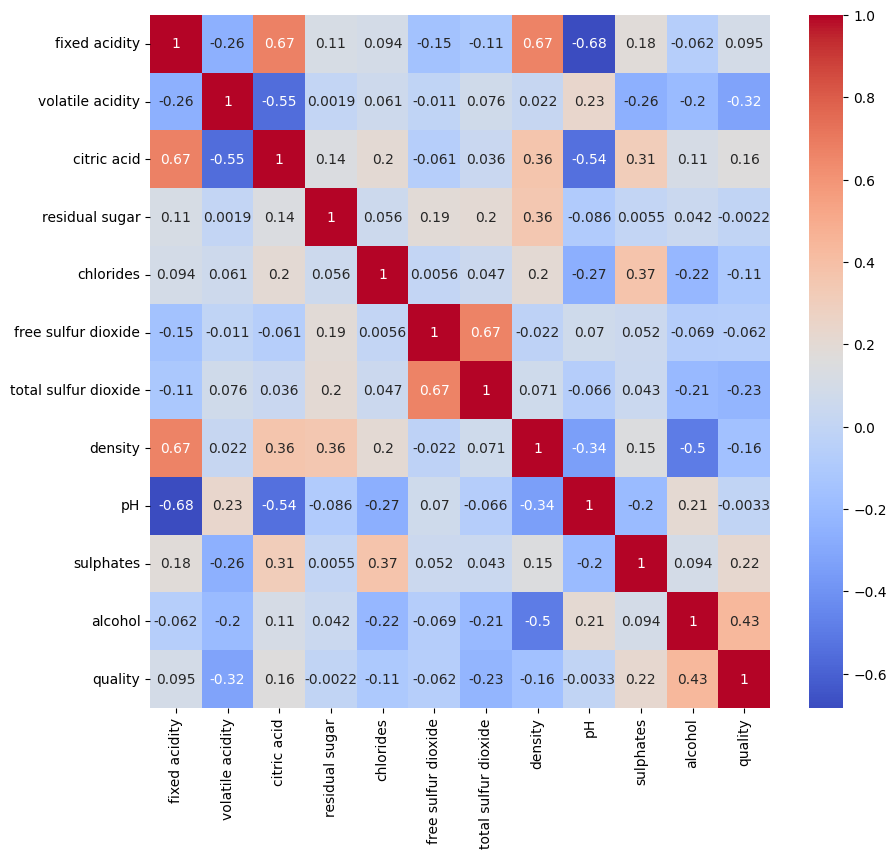

In [113]:
# Pre-Processing the Dataset

# Cleaning the Data
Data.dropna(axis = 0, inplace = True)

# Display correlation matrix in heatmap
corr = Data.corr()
plt.figure(figsize = (10, 9))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [114]:
'''From the heatmap, we can see that features like pH, free sulfur dioxide, residual sugar and fixed acidity are
loosely correlated with quality and thus can be dropped.'''

# Feature Engineering
Data.drop(columns = ['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity'], inplace = True)

# Dealing with Outliers
for i in range(Data.shape[1] - 1):
    Q1 = Data[Data.columns[i]].quantile(0.25)
    Q3 = Data[Data.columns[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    Data = Data[(Data[Data.columns[i]]>lower_limit)&(Data[Data.columns[i]]<upper_limit)]

Data.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,1
4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


In [115]:
# Splitting the Dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(Data[Data.columns[:7]], Data['quality'], test_size= 0.30)

# Normalizing the Dataset
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# **Decision Trees Classification**

In [116]:
from sklearn import tree
trees_classify = tree.DecisionTreeClassifier()
trees_classify = trees_classify.fit(x_train, y_train)
y_pred1 = trees_classify.predict(x_test)

# **Random Forest Classification**

In [117]:
from sklearn.ensemble import RandomForestClassifier
forest_classify = RandomForestClassifier(n_estimators = 4, max_depth = None, min_samples_split = 2, random_state = 0)
forest_classify.fit(x_train, y_train)
y_pred2 = forest_classify.predict(x_test)

# **Evaluation**

In [118]:
# Accuracy score
print(trees_classify.score(x_test, y_test))     # For Decision Trees Classification
print(forest_classify.score(x_test, y_test))    # For Random Forest Classification

# f1 score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred1))                # For Decision Trees Classification
print(f1_score(y_test, y_pred2))                # For Random Forest Classification

0.691358024691358
0.7333333333333333
0.7165532879818595
0.7403846153846153
